<a href="https://colab.research.google.com/github/JoaoDiamantino/clusterization_python/blob/main/Cluster_Exercicios_Favero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercícios do Capítulo 9 do livro "Manual de Análise de Dados - Estatística e Modelagem Multivariada com Excel®, SPSS® e Stata®"**

#Q1 
(Fonte: Fávero & Belfiore (2017, Capítulo 9, Exercício 1)

O departamento de concessão de bolsas de estudo de uma faculdade deseja investigar a relação de interdependência entre os estudantes ingressantes em determinado ano letivo, com base apenas em duas variáveis 
métricas (idade, em anos, e renda média familiar, em R$). O objetivo é propor uma quantidade ainda desconhecida de novos programas de concessão de bolsas voltados a grupos homogêneos de alunos. Para tanto, 
foram coletados os dados dos 100 novos estudantes e elaborada uma base, que se encontra nos arquivos Bolsa_de_Estudo.xlsx, com as seguintes variáveis: 


**estudante**: Variável string que identifica o estudante ingressante na faculdade. 

**idade**: Idade do estudante (anos). 

**renda**: Renda média familiar (R$). 

In [1]:
import pandas as pd


In [2]:
url = 'https://github.com/JoaoDiamantino/clusterization_python/raw/main/Bolsa_de_Estudos.xlsx'

df = pd.read_excel(url)

In [3]:
df.describe()

,idade,renda
count,100.000000,100.000000
mean,30.550000,1753.000000
std,7.249347,2560.478767
min,21.000000,1100.000000
25%,27.000000,1300.000000
50%,30.000000,1500.000000
75%,33.000000,1700.000000
max,82.000000,27000.000000


##Q1.a

Elabore uma análise de agrupamentos por meio de um esquema de aglomeração hierárquico, com método de encadeamento completo (jurthest neighbor) e distância quadrática euclidiana. Apresente apenas 
a parte final da tabela do esquema de aglomeração e discuta os resultados. Lembrete: Como as variáveis possuem unidades distintas de medida, é necessária a aplicação do procedimento de padronização 
Zscores para a correta elaboração da análise de agrupamentos. 


**passo 1:** padronizar os dados númericos

In [4]:
# importando biblioteca Stats para padronização com Zscores
import scipy.stats as stats

In [5]:
Zcols = df.drop(columns=['estudante'])

for i in Zcols:
  df[i] = stats.zscore(df[i])
 


In [6]:
df.head()

,estudante,idade,renda
0,Gabriela,0.339664,-0.099307
1,Luiz Felipe,-0.492166,-0.099307
2,Patrícia,-0.492166,-0.060055
3,Ovídio,-0.076251,-0.060055
4,Leonor,0.755579,0.018448


**passo 2:** Método Hierárquico com método de encadeamento completo e  distância quadrática eucliana

In [7]:
import scipy.cluster.hierarchy as sch

In [8]:
Zcols = df.drop(columns=['estudante'])
encadeamento = sch.linkage(Zcols, method = 'complete', metric = 'sqeuclidean')

**passo 3** Análise pelo Dendogramna

In [9]:
import matplotlib.pyplot as plt

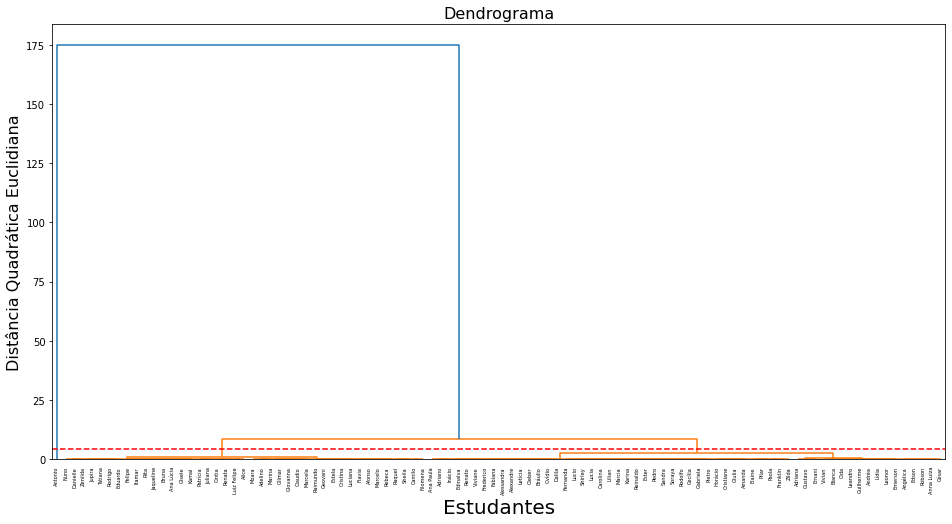

In [10]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(encadeamento, labels = list(df.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Estudantes', fontsize=20)
plt.ylabel('Distância Quadrática Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

##Q1.b

Com base na tabela do item anterior e no dendrograma, pergunta-se: Há indícios de serem formados 
quantos agrupamentos de estudantes? 

Resposta:
*Há indícios de serem formados 2 clusters na disposição atual dos dados*


##Q1.c

É possível identificar um ou mais estudantes muito discrepantes dos demais em relação às duas variáveis 
em análise? 


In [11]:
df.describe(percentiles =[.25, .5, .75, .90,.95, .99])

,idade,renda
count,1.000000e+02,1.000000e+02
mean,-7.882583e-17,-1.970646e-17
std,1.005038e+00,1.005038e+00
min,-1.323997e+00,-2.563152e-01
25%,-4.921663e-01,-1.778113e-01
50%,-7.625112e-02,-9.930743e-02
75%,3.396641e-01,-2.080353e-02
90%,7.555793e-01,1.844842e-02
95%,1.171494e+00,1.844842e-02
99%,1.642865e+00,2.339416e-01


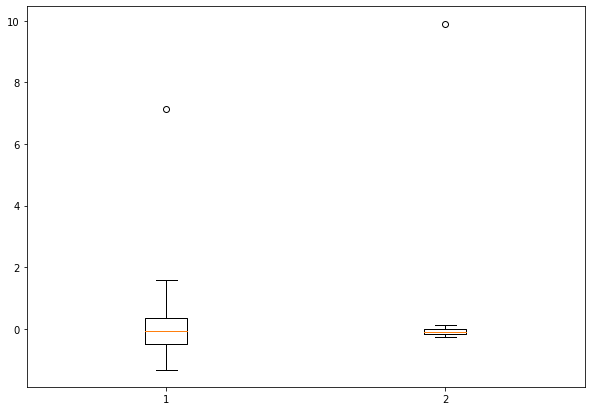

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([Zcols['idade'],Zcols['renda']])
plt.show()

Resposta: *Há presença de estudantes com valores discrepantes em relação às variáveis em análise*.

##Q1.d

 Se a resposta do item anterior for positiva, elabore novamente a análise de agrupamentos hierárquicos com 
os mesmos critérios, porém, agora, sem o(s) estudante(s) considerado(s) discrepante(s).A partir da análise 
dos novos resultados, podem ser identificados novos agrupamentos?


**removendo outliers**:


In [13]:
#valores maiores que z=6
out = df.loc[df['idade']>6,:]
out

,estudante,idade,renda
8,Antonio,7.132945,9.90994


In [14]:
# Os valores discrepantes de idade e renda pertencem ao Antônio. Vamos excluí-lo:
df.drop(index = 8, inplace = True)

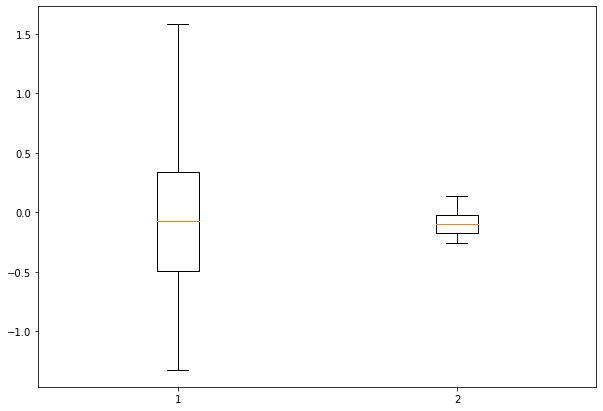

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot([df['idade'],df['renda']])
plt.show()

**refazendo aglomeração**:

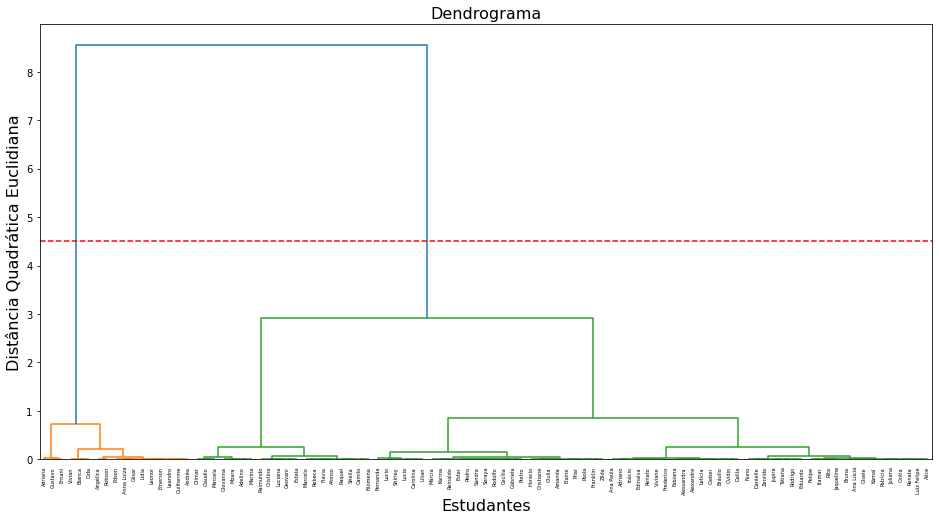

In [16]:
Zcols = df.drop(columns=['estudante'])
encadeamento = sch.linkage(Zcols, method = 'complete', metric = 'sqeuclidean')


plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(encadeamento, labels = list(df.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Estudantes', fontsize=16)
plt.ylabel('Distância Quadrática Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

Resposta: *Sim, houve um rearranjo dos agrupamentos com a remoção dos valores discrepantes*

##Q1.e

Discuta como a presença de outliers pode prejudicar a interpretação dos resultados em análise de agrupamentos. 

Resposta: *A existência de outliers pode fazer com que outras observações não tão similares acabem alocadas em um mesmo agrupamento pelo fato de se afastarem substancialmente da primeira. A reaplicação do método, sem a presença de valores discrepantes, gera novos agrupamentos mais bem estruturados e com maior homogeneidade interna.*


#Q2

(Fonte: Fávero & Belfiore (2017, Capítulo 9, Exercício 2)

A diretoria de marketing de um grupo varejista deseja estudar eventuais discrepâncias existentes em suas 
18 lojas espalhadas em três regionais distribuídas pelo território nacional. A direção da companhia, a fim de 
manter e preservar a imagem e a identidade da marca, deseja saber se as lojas são homogêneas em relação à 
percepção dos consumidores sobre atributos como atendimento, sortimento e organização. Dessa forma, foi 
inicialmente elaborada uma pesquisa com amostras de clientes em cada loja, a fim de que fossem coletados 
dados referentes a esses atributos, definidos com base na nota média obtida (O a 100) em cada estabelecimento 
comercial. 
Na sequência, foi elaborado o banco de dados de interesse, que contém as seguintes variáveis: 



**loja**: string que varia de 01 a 18 e que identifica o estabelecimento comercial (loja). 

**regional**: string que identifica cada regional (Regional 1 a Regional 3).

**atendimento**: Avaliação média dos consumidores sobre o atendimento (nota de O a 100). 

**sortimento**: Avaliação média dos consumidores sobre o sortimento (nota de O a 100). 

**organização**: Avaliação média dos consumidores sobre a organização da loja (nota de O a 100).


Os dados encontram-se nos arquivos Regional Varejista.sav.

In [17]:
url = 'https://github.com/JoaoDiamantino/clusterization_python/raw/main/Regional_Varejista.xlsx'

df2 = pd.read_excel(url)

In [18]:
df2.head()

,loja,regional,atendimento,sortimento,organização
0,1,Regional 3,6,6,4
1,2,Regional 3,14,2,4
2,3,Regional 3,8,4,6
3,4,Regional 3,4,4,4
4,5,Regional 3,6,6,6


In [19]:
df2.describe()

,loja,atendimento,sortimento,organização
count,18.000000,18.000000,18.000000,18.000000
mean,9.500000,28.111111,27.888889,33.111111
std,5.338539,27.003026,30.497616,37.247801
min,1.000000,2.000000,2.000000,2.000000
25%,5.250000,6.000000,4.000000,4.000000
50%,9.500000,11.000000,6.000000,6.000000
75%,13.750000,52.000000,51.500000,55.000000
max,18.000000,78.000000,86.000000,100.000000


##Q2.a

Elabore uma análise de agrupamentos por meio de um esquema de aglomeração hierárquico, com método 
de encadeamento único e distância euclidiana. Apresente a matriz de distâncias entre cada par de observações. 

**Lembrete**: Como as variáveis possuem a mesma unidade de medida, não é necessária a aplicação 
do procedimento de padronização Zscores.


In [20]:
Zcols2 = df2.drop(["loja", "regional"], axis=1)

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
pd.DataFrame(euclidean_distances(Zcols2, Zcols2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,8.944272,3.464102,2.828427,2.000000,106.131993,86.579443,2.000000,3.464102,2.000000,98.508883,108.332821,121.950810,112.871608,100.598211,4.472136,79.874902,4.000000
1,8.944272,0.000000,6.633250,10.198039,9.165151,105.299573,87.223850,8.246211,10.392305,9.165151,96.041658,106.320271,119.431989,110.941426,99.959992,12.165525,78.255990,8.000000
2,3.464102,6.633250,0.000000,4.472136,2.828427,104.364745,86.740994,2.828427,4.000000,4.898979,96.436508,106.301458,120.349491,112.463327,100.019998,6.324555,78.993671,3.464102
3,2.828427,10.198039,4.472136,0.000000,3.464102,107.368524,89.039317,2.000000,2.000000,3.464102,100.039992,109.726934,124.000000,115.568162,102.956301,2.000000,82.292162,2.828427
4,2.000000,9.165151,2.828427,3.464102,0.000000,104.326411,85.813752,2.828427,2.828427,4.000000,96.850400,106.602064,120.581922,112.285351,99.538937,4.898979,78.841613,4.472136
5,106.131993,105.299573,104.364745,107.368524,104.326411,0.000000,73.810568,106.752049,105.584090,107.944430,22.090722,14.696938,45.519227,88.022724,58.855756,108.018517,58.617404,107.405773
6,86.579443,87.223850,86.740994,89.039317,85.813752,73.810568,0.000000,88.249646,88.294960,87.384209,67.941151,75.365775,64.187226,38.832976,24.494897,89.866568,26.305893,89.933309
7,2.000000,8.246211,2.828427,2.000000,2.828427,106.752049,88.249646,0.000000,2.828427,2.828427,99.055540,108.866891,122.849501,114.297856,102.000000,4.000000,81.141851,2.000000
8,3.464102,10.392305,4.000000,2.000000,2.828427,105.584090,88.294960,2.828427,0.000000,4.898979,98.407317,108.018517,122.653985,114.995652,101.921538,2.828427,81.289606,3.464102
9,2.000000,9.165151,4.898979,3.464102,4.000000,107.944430,87.384209,2.828427,4.898979,0.000000,100.179838,110.072703,123.336937,113.490088,101.685791,4.898979,80.944425,4.472136


##Q2.b

Apresente e discuta a tabela do esquema de aglomeração. 

In [22]:
esquema = sch.linkage(Zcols2, method = 'single', metric = 'euclidean', optimal_ordering = True) 
pd.DataFrame(esquema)

,0,1,2,3
0,0.0,4.0,2.000000,2.0
1,7.0,18.0,2.000000,3.0
2,3.0,19.0,2.000000,4.0
3,8.0,20.0,2.000000,5.0
4,21.0,9.0,2.000000,6.0
5,15.0,22.0,2.000000,7.0
6,23.0,17.0,2.000000,8.0
7,24.0,2.0,2.828427,9.0
8,25.0,1.0,6.633250,10.0
9,10.0,11.0,12.328828,2.0


Resposta: *Através da tabela de esquema de aglomeração percebemos um grande salto entre a 16º para a 17° etapa.*

##Q2.c

Com base na tabela do item anterior e no dendrograma, pergunta-se: Há indícios de serem formados 
quantos agrupamentos de lojas?

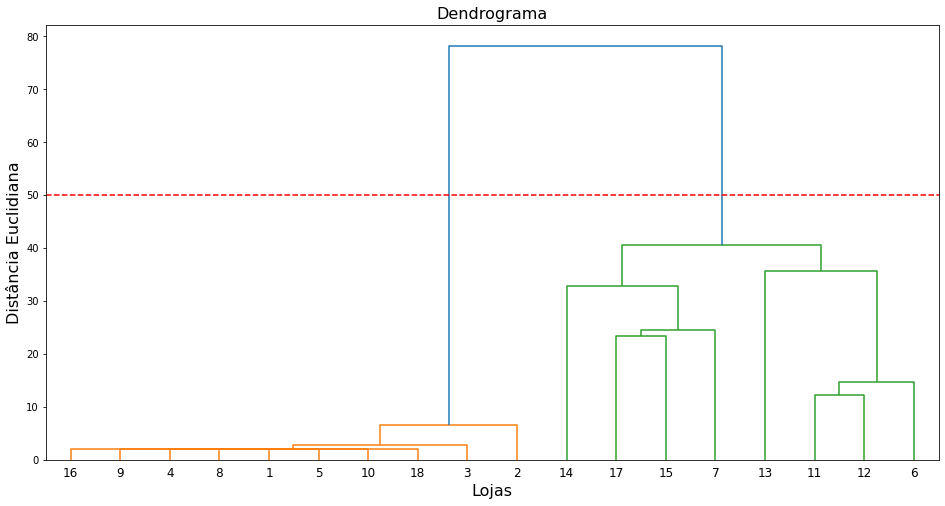

In [23]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(esquema,p = 4, labels = list(df2.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 50, color = 'red', linestyle = '--')
plt.show()

Resposta: *Há indícios de 2 clusters pela análise do dendograma*

##Q2.d

Elabore um escalonamento multidimensional e, na sequência, apresente e discuta o gráfico bidimensional 
gerado com as posições relativas das lojas.

In [24]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [25]:
# transformando o array das 3 colunas em um espaço 2D
mds = MDS(random_state=0)
X_transform = mds.fit_transform(Zcols2)
print(X_transform)

[[ 18.96445487  38.22407763]
 [ 24.06808999  33.43816623]
 [ 17.7895445   36.89953299]
 [ 18.03751458  41.0176343 ]
 [ 16.65438276  37.85236835]
 [-62.18328437 -29.06128076]
 [ 16.16580077 -47.83445143]
 [ 18.79759393  39.45721698]
 [ 16.36776237  40.32778516]
 [ 21.09519176  38.84139498]
 [-47.97815805 -33.32106333]
 [-58.48203273 -37.60113396]
 [-41.7358222  -68.14332834]
 [ 15.55597101 -75.95660073]
 [ -6.44875942 -59.2062215 ]
 [ 17.48258302  42.67757454]
 [ -3.8979439  -38.21977689]
 [ 19.74711111  40.60810578]]


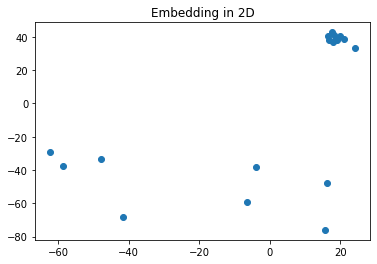

In [26]:
ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1])
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

Resposta: *O gráfico bidimensional gerado por meio do escalonamento multidimensional permite que sejam 
visualizados estes dois clusters, sendo um mais homogêneo que o outro.* 


##Q2.e

Elabore uma análise de agrupamentos por meio do procedimento k-means, com a quantidade de agrupamentos sugerida no item (c), e interprete, considerando o nível de significância de 5%, a análise de variância de um fator para cada variável considerada no estudo. Qual variável mais contribui para a formação de 
pelo menos um dos clusters formados, ou seja, qual delas é a mais discriminante dos grupos?


In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random').fit(Zcols2)

In [28]:
kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

[0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


In [29]:
df2['Kmeans_Clusters'] = kmeans_clusters
df2

,loja,regional,atendimento,sortimento,organização,Kmeans_Clusters
0,1,Regional 3,6,6,4,0
1,2,Regional 3,14,2,4,0
2,3,Regional 3,8,4,6,0
3,4,Regional 3,4,4,4,0
4,5,Regional 3,6,6,6,0
5,6,Regional 2,38,38,100,1
6,7,Regional 1,40,78,38,1
7,8,Regional 3,6,4,4,0
8,9,Regional 3,4,4,6,0
9,10,Regional 3,6,6,2,0


**ANOVA**

In [30]:
# Função pronta para cálculo da ANOVA

def teste_f_kmeans(kmeans, dataframe):
    
    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides
    
    print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}

        # variabilidade entre os grupos

        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']
        
        dic_var['sig F'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    
    print(df)

    return df

In [32]:
teste_f_kmeans(kmeans, Zcols2)

Centróides: 
    atendimento  sortimento  organização
0          6.2         4.2          4.4
1         55.5        57.5         69.0 

      variavel  variabilidade_entre_grupos  variabilidade_dentro_dos_grupos  \
0  atendimento                10802.177778                             99.6   
1   sortimento                12626.177778                            199.1   
2  organização                18547.377778                            314.9   

            F         sig F  
0  108.455600  1.557137e-08  
1   63.416262  5.884750e-07  
2   58.899263  9.463970e-07  


,variavel,variabilidade_entre_grupos,variabilidade_dentro_dos_grupos,F,sig F
0,atendimento,10802.177778,99.6,108.455600,1.557137e-08
1,sortimento,12626.177778,199.1,63.416262,5.884750e-07
2,organização,18547.377778,314.9,58.899263,9.463970e-07


Resposta: *A variável* **atendimento** *é a que mais contribui para a formação de pelo menos um dos clusters por ter o seu valor da estatística F maior que as outras. Apesar de possuir a menor variabilidade entres grupos, internamente mostra-se muito mais homogênea que as demais.*

##Q2.f

Existe correspondência entre as alocações das observações nos grupos obtidas pelos métodos hierárquico 
e não hierárquico? 


In [33]:
# gerando os clusters do método hierárquico para comparação:

from sklearn.cluster import AgglomerativeClustering

cluster_sing = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(Zcols2)

In [34]:
df2['Hierárquico_Clusters'] = indica_cluster_sing

In [35]:
df2

,loja,regional,atendimento,sortimento,organização,Kmeans_Clusters,Hierárquico_Clusters
0,1,Regional 3,6,6,4,0,1
1,2,Regional 3,14,2,4,0,1
2,3,Regional 3,8,4,6,0,1
3,4,Regional 3,4,4,4,0,1
4,5,Regional 3,6,6,6,0,1
5,6,Regional 2,38,38,100,1,0
6,7,Regional 1,40,78,38,1,0
7,8,Regional 3,6,4,4,0,1
8,9,Regional 3,4,4,6,0,1
9,10,Regional 3,6,6,2,0,1


Resposta: *Apesar de estarem com as etiquetas de clusters invertidas, os dois métodos geraram exatamente o mesmo agrupamento.*

##Q2.g

É possível identificar associação entre alguma regional e determinado grupo discrepante de lojas, o que 
poderia justificar a preocupação da diretoria em relação à imagem e à identidade da marca? Caso a resposta 
seja afirmativa, elabore novamente a análise de agrupamentos hierárquicos com os mesmos critérios, porém, agora, sem esse grupo discrepante de lojas.A partir da análise dos novos resultados, pode-se visualizar, 
de forma mais nítida, as diferenças entre as demais lojas?

In [39]:
Reg1 = df2.loc[df2['regional']== 'Regional 1',:]
Reg2 = df2.loc[df2['regional']== 'Regional 2',:]
Reg3 = df2.loc[df2['regional']== 'Regional 3',:]

print(Reg1.describe())
print(Reg2.describe())
print(Reg3.describe())

            loja  atendimento  sortimento  organização  Kmeans_Clusters  \
count   4.000000     4.000000    4.000000     4.000000              4.0   
mean   13.250000    56.000000   74.000000    45.000000              1.0   
std     4.349329    15.916449   12.754084     9.451631              0.0   
min     7.000000    40.000000   56.000000    38.000000              1.0   
25%    12.250000    49.000000   71.000000    38.000000              1.0   
50%    14.500000    53.000000   77.000000    42.000000              1.0   
75%    15.500000    60.000000   80.000000    49.000000              1.0   
max    17.000000    78.000000   86.000000    58.000000              1.0   

       Hierárquico_Clusters  
count                   4.0  
mean                    0.0  
std                     0.0  
min                     0.0  
25%                     0.0  
50%                     0.0  
75%                     0.0  
max                     0.0  
            loja  atendimento  sortimento  organização

Resposta 1: A Regional 3 possui todas as suas lojas no mesmo cluster e possui a menor média nas três variáveis dentre as outras, sendo assim um grupo discrepante. Esse fato poderia apoiar na tomada de decisão de alguma ação específica para estas lojas.

*refazendo o agrupamento sem o cluster 0 (kmeans)*

In [40]:
dfNew = df2.loc[df2['Kmeans_Clusters']==1,:]
dfNew.head()

,loja,regional,atendimento,sortimento,organização,Kmeans_Clusters,Hierárquico_Clusters
5,6,Regional 2,38,38,100,1,0
6,7,Regional 1,40,78,38,1,0
10,11,Regional 2,54,32,86,1,0
11,12,Regional 2,52,34,98,1,0
12,13,Regional 2,76,60,88,1,0


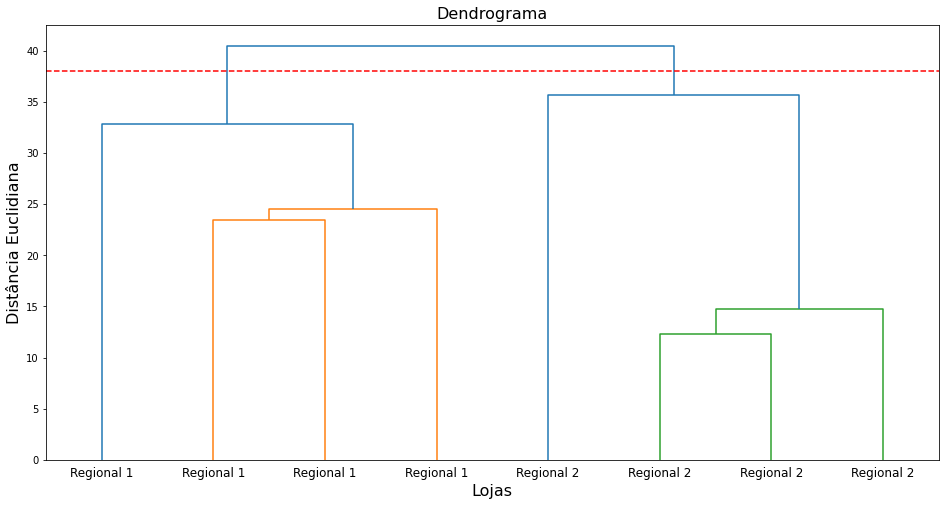

In [45]:
Zcols2New = dfNew.drop(["loja", "regional"], axis=1)

esquemaNew = sch.linkage(Zcols2New, method = 'single', metric = 'euclidean', optimal_ordering = True) 

plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(esquemaNew,p = 4, labels = list(dfNew.regional))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 38, color = 'red', linestyle = '--')
plt.show()

Resposta Final: *Pelo dendograma,observamos que a divisão entre as lojas sem a regional 3 ficou mais clara, agrupando, inclusive, a Regional 1 e 2 em dois diferentes clusters.*

#Q3

(Fonte: Fávero & Belfiore (2017, Capítulo 9, Exercício 3)

Um analista do mercado financeiro decide elaborar uma pesquisa com presidentes e diretores de grandes empresas atuantes nos setores de saúde, educação e transporte, a fim de investigar o modo como são realizados 
as operações das companhias e os mecanismos que regem os processos decisórios. Para tanto, elaborou um 
questionário com 50 perguntas, cujas respostas são apenas dicotômicas, ou binárias.Após a aplicação do questionário, obteve um retorno de 35 empresas e, a partir de então, estruturou o banco de dados, presente nos 
arquivos Pesquisa Binária.xlsx De maneira genérica, as variáveis são:

**q1 a q50**: 50 variáveis dummy que se referem ao modo como são realizados as operações 
e os processos de tomada de decisão nas empresas.


**setor**: Setor de atuação da empresa (critério Bovespa). 


O principal objetivo do analista é verificar se empresas atuantes no mesmo setor apresentam similaridades em relação ao modo como são realizados as operações e os processos de tomada de decisão, ao menos na 
perspectiva dos próprios gestores. Para tanto, após a coleta dos dados, pode ser elaborada uma análise de agrupamentos. Pede-se: 


In [46]:
import pandas as pd

url = 'https://github.com/JoaoDiamantino/clusterization_python/raw/main/Pesquisa_Binaria.xlsx'

df3 = pd.read_excel(url)

In [47]:
df3.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,1,1,0,...,1,0,1,1,1,0,1,0,1,2
2,0,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,1,2
3,1,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,3
4,1,0,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,1,0,1,3


##Q3.a

Com base na análise de agrupamentos hierárquicos elaborada com método de encadeamento médio (between groups) e medida de semelhança (similaridade) de emparelhamento simples para variáveis binárias, 
analise o esquema de aglomeração gerado, o dendograma e verifique se existe correspondência entre as alocações das empresas nos clusters e os respectivos setores de 
atuação.


In [48]:
import scipy.spatial

In [56]:
# usando função para matriz de similaridade pelo método de emparelhamento simples:
#(Sokal e Michener)

BinCols = df3.drop('setor', axis =1)

metric = 'sokalmichener'

Matriz = scipy.spatial.distance.cdist(BinCols, BinCols, metric = metric)

In [57]:
Matriz = pd.DataFrame(Matriz)
Matriz

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.795181,0.717949,0.666667,0.611111,0.888889,0.684211,0.611111,0.412698,0.360656,...,0.780488,0.507463,0.666667,0.648649,0.795181,0.780488,0.666667,0.823529,0.701299,0.461538
1,0.795181,0.000000,0.360656,0.684211,0.734177,0.412698,0.666667,0.734177,0.611111,0.648649,...,0.461538,0.484848,0.684211,0.701299,0.333333,0.412698,0.717949,0.333333,0.717949,0.648649
2,0.717949,0.360656,0.000000,0.591549,0.648649,0.437500,0.529412,0.648649,0.550725,0.630137,...,0.387097,0.507463,0.591549,0.611111,0.305085,0.333333,0.550725,0.360656,0.591549,0.630137
3,0.666667,0.684211,0.591549,0.000000,0.305085,0.630137,0.507463,0.360656,0.648649,0.750000,...,0.666667,0.717949,0.484848,0.412698,0.717949,0.630137,0.387097,0.717949,0.484848,0.648649
4,0.611111,0.734177,0.648649,0.305085,0.000000,0.648649,0.529412,0.437500,0.666667,0.734177,...,0.717949,0.734177,0.412698,0.437500,0.734177,0.648649,0.461538,0.734177,0.550725,0.630137
5,0.888889,0.412698,0.437500,0.630137,0.648649,0.000000,0.571429,0.684211,0.734177,0.823529,...,0.437500,0.701299,0.630137,0.684211,0.305085,0.387097,0.630137,0.305085,0.630137,0.734177
6,0.684211,0.666667,0.529412,0.507463,0.529412,0.571429,0.000000,0.484848,0.734177,0.734177,...,0.611111,0.701299,0.412698,0.484848,0.591549,0.571429,0.360656,0.630137,0.412698,0.630137
7,0.611111,0.734177,0.648649,0.360656,0.437500,0.684211,0.484848,0.000000,0.666667,0.666667,...,0.648649,0.734177,0.461538,0.437500,0.701299,0.684211,0.412698,0.701299,0.507463,0.630137
8,0.412698,0.611111,0.550725,0.648649,0.666667,0.734177,0.734177,0.666667,0.000000,0.387097,...,0.630137,0.333333,0.750000,0.666667,0.611111,0.630137,0.684211,0.648649,0.717949,0.484848
9,0.360656,0.648649,0.630137,0.750000,0.734177,0.823529,0.734177,0.666667,0.387097,0.000000,...,0.666667,0.387097,0.717949,0.701299,0.684211,0.701299,0.717949,0.684211,0.750000,0.484848


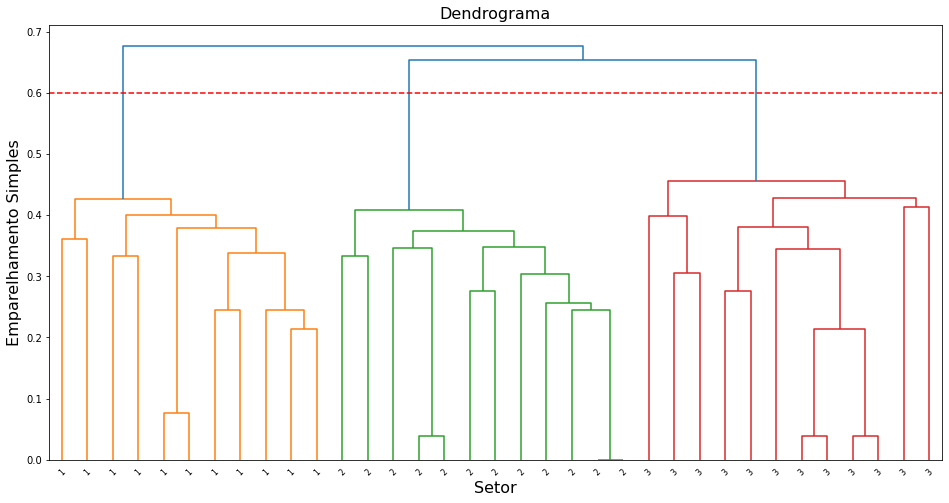

In [72]:
# encadeamento pelo método médio (average linkage)

plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(BinCols, method = 'average', metric = metric), labels = list(df3.setor))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Setor', fontsize=16)
plt.ylabel('Emparelhamento Simples', fontsize=16)
plt.axhline(y = 0.6, color = 'red', linestyle = '--')
plt.show()

Resposta: *A divisão dos clusters formados está bem estruturado com homogeneidade interna e externa parecidas. Cada setor foi agrupado inteiramente em um cluster, indicando uma clara especifidade operacional para cada um destes setores na percepção dos gestores*

#Q4

(Fonte: Fávero & Belfiore (2017, Capítulo 9, Exercício 4)

O proprietário de uma empresa hortifrúti decide monitorar as vendas de seus produtos ao longo de 16 semanas (4 meses). O objetivo principal é verificar se existe recorrência do comportamento de vendas de três 
principais produtos (banana, laranja e maçã) após certo período, em função das oscilações semanais de preços 
dos produtores, repassados aos consumidores e que podem afetar as vendas. Os dados encontram-se nos arquivos Hortifrúti.xlsx, que apresentam as seguintes variáveis: 

**semana Variável**: string que varia de 1 a 16 e identifica a semana em que as vendas 
foram monitoradas. 
**semana_mês**: Variável string que varia de 1 a 4 e identifica a semana de cada um dos meses. 

**banana**: Quantidade de bananas vendidas na semana (un.). 

**laranja**: Quantidade de laranjas vendidas na semana (un.). 

**maçã**: Quantidade de maçãs vendidas na semana (un.). 

Pede_se:


In [73]:
import pandas as pd

url = "https://github.com/JoaoDiamantino/clusterization_python/raw/main/Hortifruti.xlsx"

df4 = pd.read_excel(url)

In [74]:
df4.head()

,semana,semana_mes,banana,laranja,maçã
0,1,1,1000,1700,2400
1,2,2,1100,1200,1200
2,3,3,1500,1000,500
3,4,4,700,600,700
4,5,1,2000,3500,4700


In [93]:
df4['banana'] = pd.to_numeric(df4['banana'])
df4['laranja'] = pd.to_numeric(df4['laranja'])
df4['maçã'] = pd.to_numeric(df4['maçã'])

#Q4.a

Elabore uma análise de agrupamentos por meio de um esquema de aglomeração hierárquico, com método de encadeamento único (nearest neighbor) e medida de correlação de Pearson. Apresente a matriz de 
medidas de similaridade (correlação de Pearson) entre cada linha do banco de dados (períodos semanais). 

**Lembrete**: Como as variáveis possuem a mesma unidade de medida, não é necessária a aplicação do procedimento de padronização Zscores. 


**Nota**: *O coeficiente de 
correlação de Pearson pode ser utilizado corno medida de similaridade entre as linhas do banco 
de dados em análises que envolvem, por exemplo, séries de tempo, ou seja, para os casos em que as 
observações representam períodos.*


In [75]:
import scipy.cluster.hierarchy as sch

NumCols = df4.drop(['semana','semana_mes'], axis = 1)

encadeamento = sch.linkage(NumCols, method = 'single', metric = 'correlation')


In [84]:
import numpy as np
Matrix_C = np.corrcoef(NumCols,NumCols)
pd.DataFrame(Matrix_C)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000e+00,0.866025,-1.000000e+00,-1.687812e-17,0.997949,0.944911,-0.995871,-1.125208e-17,1.000000e+00,0.970725,...,-0.995871,-1.125208e-17,1.000000e+00,0.970725,-0.999802,-0.500000,0.998625,0.996616,-0.999539,0.327327
1,8.660254e-01,1.000000,-8.660254e-01,-5.000000e-01,0.896258,0.654654,-0.907841,-5.000000e-01,8.660254e-01,0.720577,...,-0.907841,-5.000000e-01,8.660254e-01,0.720577,-0.855901,-0.866025,0.891042,0.821995,-0.880812,-0.188982
2,-1.000000e+00,-0.866025,1.000000e+00,7.876455e-18,-0.997949,-0.944911,0.995871,-1.575291e-17,-1.000000e+00,-0.970725,...,0.995871,-1.575291e-17,-1.000000e+00,-0.970725,0.999802,0.500000,-0.998625,-0.996616,0.999539,-0.327327
3,-1.687812e-17,-0.500000,7.876455e-18,1.000000e+00,-0.064018,0.327327,0.090784,1.000000e+00,-7.876455e-18,0.240192,...,0.090784,1.000000e+00,-7.876455e-18,0.240192,-0.019905,0.866025,-0.052414,0.082199,0.030373,0.944911
4,9.979487e-01,0.896258,-9.979487e-01,-6.401844e-02,1.000000,0.922018,-0.999640,-6.401844e-02,9.979487e-01,0.953357,...,-0.999640,-6.401844e-02,9.979487e-01,0.953357,-0.996477,-0.554416,0.999932,0.989309,-0.999433,0.266164
5,9.449112e-01,0.654654,-9.449112e-01,3.273268e-01,0.922018,1.000000,-0.911293,3.273268e-01,9.449112e-01,0.995871,...,-0.911293,3.273268e-01,9.449112e-01,0.995871,-0.951239,-0.188982,0.926456,0.968620,-0.934533,0.618590
6,-9.958706e-01,-0.907841,9.958706e-01,9.078413e-02,-0.999640,-0.911293,1.000000,9.078413e-02,-9.958706e-01,-0.944911,...,1.000000,9.078413e-02,-9.958706e-01,-0.944911,0.993866,0.576557,-0.999260,-0.985038,0.998169,-0.240192
7,-1.125208e-17,-0.500000,-1.575291e-17,1.000000e+00,-0.064018,0.327327,0.090784,1.000000e+00,1.575291e-17,0.240192,...,0.090784,1.000000e+00,1.575291e-17,0.240192,-0.019905,0.866025,-0.052414,0.082199,0.030373,0.944911
8,1.000000e+00,0.866025,-1.000000e+00,-7.876455e-18,0.997949,0.944911,-0.995871,1.575291e-17,1.000000e+00,0.970725,...,-0.995871,1.575291e-17,1.000000e+00,0.970725,-0.999802,-0.500000,0.998625,0.996616,-0.999539,0.327327
9,9.707253e-01,0.720577,-9.707253e-01,2.401922e-01,0.953357,0.995871,-0.944911,2.401922e-01,9.707253e-01,1.000000,...,-0.944911,2.401922e-01,9.707253e-01,1.000000,-0.975314,-0.277350,0.956802,0.987184,-0.962982,0.544705


In [85]:
pd.DataFrame(encadeamento)

,0,1,2,3
0,0.0,8.0,0.000000,2.0
1,3.0,7.0,0.000000,2.0
2,4.0,12.0,0.000068,2.0
3,2.0,10.0,0.000198,2.0
4,14.0,19.0,0.000461,3.0
5,16.0,18.0,0.001375,4.0
6,6.0,20.0,0.001831,4.0
7,13.0,21.0,0.003384,5.0
8,5.0,9.0,0.004129,2.0
9,23.0,24.0,0.012816,7.0


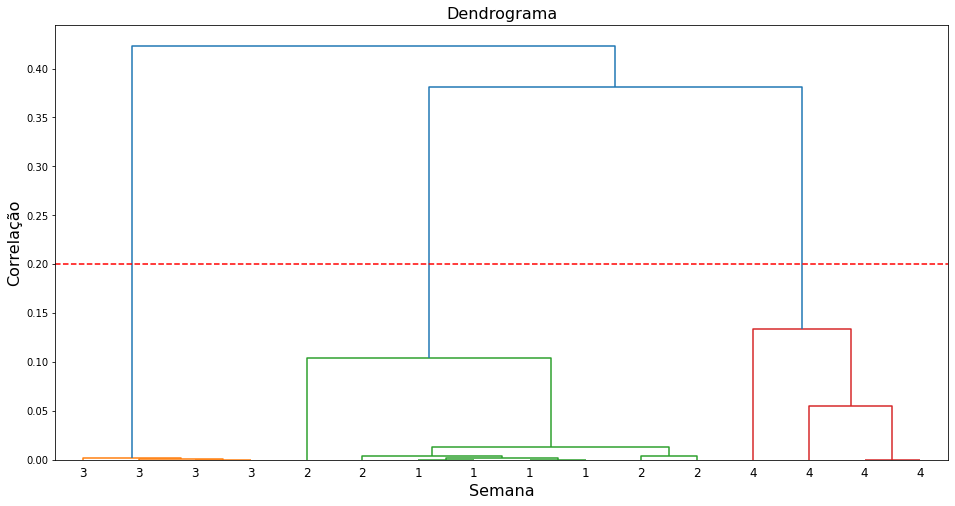

In [89]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(encadeamento, labels = list(df4.semana_mes))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Semana', fontsize=16)
plt.ylabel('Correlação', fontsize=16)
plt.axhline(y = 0.2, color = 'red', linestyle = '--')
plt.show()

In [95]:
Sem1 = df4.loc[df4['semana_mes']== 1,:]
Sem2 = df4.loc[df4['semana_mes']== 2,:]
Sem3 = df4.loc[df4['semana_mes']== 3,:]
Sem4 = df4.loc[df4['semana_mes']== 4,:]

print(Sem1.describe())
print(Sem2.describe())
print(Sem3.describe())
print(Sem4.describe())



          semana  semana_mes       banana      laranja         maçã
count   4.000000         4.0     4.000000     4.000000     4.000000
mean    7.000000         1.0  2500.000000  4300.000000  5900.000000
std     5.163978         0.0  1290.994449  2249.444376  3047.403266
min     1.000000         1.0  1000.000000  1700.000000  2400.000000
25%     4.000000         1.0  1750.000000  3050.000000  4125.000000
50%     7.000000         1.0  2500.000000  4250.000000  5850.000000
75%    10.000000         1.0  3250.000000  5500.000000  7625.000000
max    13.000000         1.0  4000.000000  7000.000000  9500.000000
          semana  semana_mes       banana      laranja         maçã
count   4.000000         4.0     4.000000     4.000000     4.000000
mean    8.000000         2.0  2750.000000  2925.000000  3250.000000
std     5.163978         0.0  1420.093894  1510.794493  1682.260384
min     2.000000         2.0  1100.000000  1200.000000  1200.000000
25%     5.000000         2.0  1925.000000  2025.

Resposta: *De acordo com o dendogramna, vemos claramente que há indícios de recorrência do comportamento das frutasde acordo com a semanado mês. A divisão em três clusteres é ideal para este caso. Ainda percebemos que temos um cluster exclusivo para a semana 1 e 2, indicando que a primeira metade do mês tem comportamento mais parecido, sofrendo queda nas próximas semanas, que por sinal se localizaram cada um em um cluster.*